In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [49]:
def compute_rate(ndofs, err):
    lin_reg = stats.linregress(np.log(ndofs), np.log(err))
    return lin_reg.slope

In [50]:
def plot_save(ndofs, L2err, H1err, sol_name):
    l2_rate = compute_rate(ndofs, L2err)
    l2_rate = round(abs(l2_rate), 2)
    h1_rate = compute_rate(ndofs, H1err)
    h1_rate = round(abs(h1_rate), 2)
    
    l2_label = 'L2 norm, rate=' + str(l2_rate)
    h1_label = 'H1 norm, rate=' + str(h1_rate)
    
    fig,ax = plt.subplots()
    ax.loglog(ndofs, L2err, label=l2_label)
    ax.loglog(ndofs, H1err, label=h1_label)
    ax.set_xlabel('Dofs[log]')
    ax.set_ylabel('Discretization err[log]')
    ax.set_title(sol_name)
    ax.legend()
    fig.savefig(sol_name+'.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


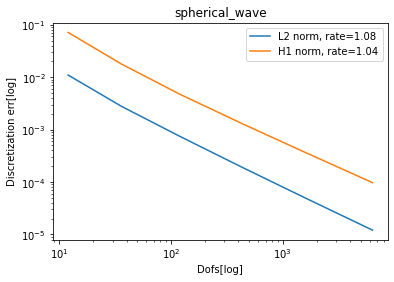

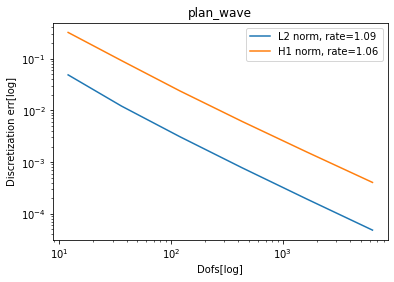

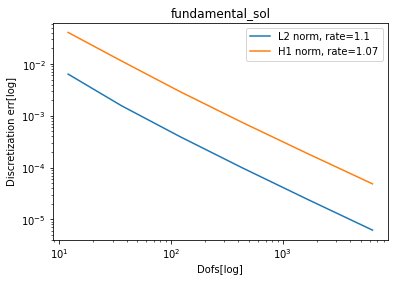

In [51]:
data_file = [i for i in os.listdir() if i.split('.')[-1] == 'txt']
for f in data_file:
    sol_name = f.split('.')[0]
    df = pd.read_csv(f, sep=' ')
    ndofs = df['N'].to_numpy()
    L2err = df['L2_err'].to_numpy()
    H1err = df['H1_err'].to_numpy()
    plot_save(ndofs, L2err, H1err, sol_name)